# EXercise 04

In [38]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [39]:
connection = sqlite3.connect('../data/checking-logs.sqlite')

## 1. analyze only the users and not the admins


In [40]:
sql_query = '''
SELECT timestamp
FROM checker
WHERE uid LIKE "user_%"
'''

df = pd.read_sql(sql_query, connection)
df

,timestamp
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370
...,...
3202,2020-05-21 20:19:06.872761
3203,2020-05-21 20:22:41.785725
3204,2020-05-21 20:22:41.877806
3205,2020-05-21 20:37:00.129678


## 2. create two lists of values (for working days and for weekends) for the histogram input

In [41]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['timestamp'] = pd.to_datetime(df['timestamp'].dt.date)
df['day_type'] = df['timestamp'].dt.dayofweek
df.drop(['timestamp'], axis=1, inplace=True)
df

,hour,day_type
0,5,4
1,5,4
2,5,4
3,5,4
4,5,4
...,...,...
3202,20,3
3203,20,3
3204,20,3
3205,20,3


In [42]:
working_day = df[~df['day_type'].isin([5, 6])]
weekend_day = df[df['day_type'].isin([5, 6])]

In [43]:
working_day.drop('day_type', axis=1, inplace=True)
working_day

/tmp/ipykernel_19096/539031072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_day.drop('day_type', axis=1, inplace=True)


,hour
0,5
1,5
2,5
3,5
4,5
...,...
3202,20
3203,20
3204,20
3205,20


In [44]:
weekend_day.drop('day_type', axis=1, inplace=True)
weekend_day

/tmp/ipykernel_19096/393309651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekend_day.drop('day_type', axis=1, inplace=True)


,hour
23,7
24,13
25,13
26,13
27,13
...,...
3088,22
3089,22
3090,22
3091,22


## 3. the figsize is still the same, you can choose the fontsize as well as the color palette
## 4. use a level of transparency for the histogram in front equal to 0.7

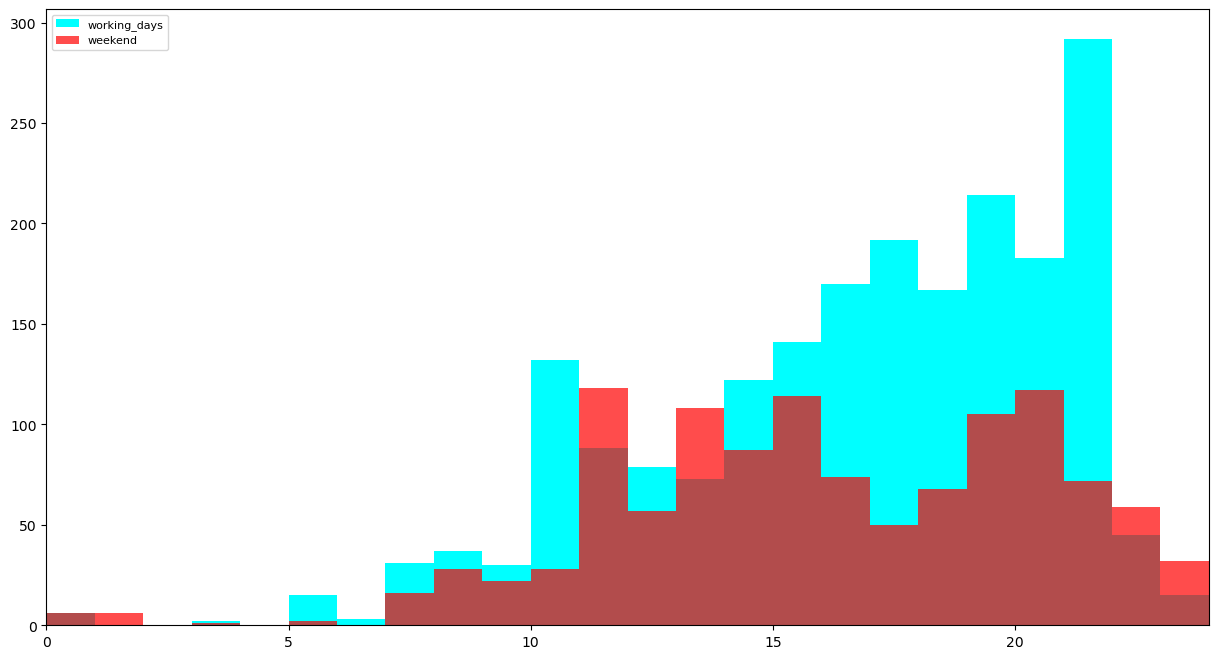

In [126]:
fig, ax = plt.subplots(figsize=(15, 8))
bins = list(range(25))
ax.hist(working_day['hour'], bins=bins, color='cyan', label='working_days')
ax.hist(weekend_day['hour'], bins=bins, color='red', alpha=0.7, label='weekend')
ax.set_xlim(0, 24)
ax.legend(loc='upper left', fontsize='8')
plt.show()

## 4. “Are there hours when the total number of commits was higher on weekends than on working days?” In your answer, put the top-4 examples.

In [70]:
working = working_day.groupby('hour').size().reset_index(name='commits_working')
weekend = weekend_day.groupby('hour').size().reset_index(name='commits_weekend')

In [80]:
result = pd.merge(weekend, working, on='hour', how='inner')
result = result.set_index('hour').sort_index()
result[result['commits_weekend'] > result['commits_working']][['commits_weekend']]

,commits_weekend
hour,
11,118
13,108
22,59
23,32


In [81]:
connection.close()